## Extract FLASH Data in yt
Mirielle Wong

6/21/24

Use yt's covering_grid class to extract data from FLASH.

In [1]:
# https://yt-project.org/

import yt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime

In [2]:
# plot_path = "./OSIRIS_transfer/MAGOFF/MagShockZ_hdf5_plt_cnt_0004"
plot_path = "./OSIRIS_transfer/MAGON/MagShockZ_hdf5_chk_0005"

In [3]:
ds = yt.load(plot_path)

yt : [INFO     ] 2024-07-15 15:25:28,130 Particle file found: MagShockZ_hdf5_chk_0005
yt : [INFO     ] 2024-07-15 15:25:28,165 Parameters: current_time              = 1.8520020414484505e-09
yt : [INFO     ] 2024-07-15 15:25:28,166 Parameters: domain_dimensions         = [288 272 288]
yt : [INFO     ] 2024-07-15 15:25:28,166 Parameters: domain_left_edge          = [-0.6   -0.075 -0.6  ]
yt : [INFO     ] 2024-07-15 15:25:28,167 Parameters: domain_right_edge         = [0.6 1.  0.6]
yt : [INFO     ] 2024-07-15 15:25:28,167 Parameters: cosmological_simulation   = 0


In [4]:
list(ds.fields.flash)

[On-Disk Field ('flash', 'absr'): (units: '', display_name: 'Absorption Coefficient'),
 On-Disk Field ('flash', 'cham'): (units: '', display_name: 'Chamber Material Fraction'),
 On-Disk Field ('flash', 'cond'): (units: '', display_name: 'Conductivity'),
 On-Disk Field ('flash', 'dbgs'): (units: '', display_name: 'Debug for Shocks'),
 On-Disk Field ('flash', 'dens'): (units: 'code_mass/code_length**3'),
 On-Disk Field ('flash', 'depo'): (units: 'code_length**2/code_time**2'),
 On-Disk Field ('flash', 'dfcf'): (units: '', display_name: 'Diffusion Equation Scalar'),
 On-Disk Field ('flash', 'divb'): (units: 'code_magnetic/code_length'),
 On-Disk Field ('flash', 'eele'): (units: 'code_mass * (code_length/code_time)**2', display_name: 'Electron Internal Specific Energy'),
 On-Disk Field ('flash', 'eint'): (units: 'code_length**2/code_time**2'),
 On-Disk Field ('flash', 'eion'): (units: 'code_mass * (code_length/code_time)**2', display_name: 'Ion Internal Specific Energy'),
 On-Disk Field ('

In [5]:
print(ds.domain_dimensions)
domain_left_edge = [-0.6, -0.075, -0.6]    # from info printed in yt.load

[288 272 288]


In [6]:
# this is from the yt documentation

level = 2
dims = ds.domain_dimensions * ds.refine_by**level

# We construct an object that describes the data region and structure we want
# In this case, we want all data up to the maximum "level" of refinement
# across the entire simulation volume.  Higher levels than this will not
# contribute to our covering grid.
all_data = ds.covering_grid(
    level,
    left_edge=domain_left_edge,
    dims=dims,
    # And any fields to preload (this is optional!)
)

In [7]:
# relevant vars

print(ds.units)
print(ds.length_unit)
print(ds.mass_unit)
print(dims)
print(ds.domain_dimensions)
print(ds.refine_by)

1.0 cm
1.0 g
[1152 1088 1152]
[288 272 288]
2


In [8]:
data_level0 = ds.covering_grid(
    1,
    left_edge=domain_left_edge,
    dims=ds.domain_dimensions
)

In [9]:
# check shape

print(data_level0['flash', 'vely'][:, :, 0].shape)
print(data_level0['index', 'cell_volume'].shape)

(288, 272)
(288, 272, 288)


In [10]:
# we can create a df for any any field in ds.fields.flash
ye = pd.DataFrame(data_level0['flash', 'ye'][:, :, 0]) # why is this taking the zeroth index?
tion = pd.DataFrame(data_level0['flash', 'tion'][:, :, 0])

In [11]:
density = pd.DataFrame(data_level0['flash', 'dens'][:, :, -1])
trad = pd.DataFrame(data_level0['flash', 'trad'][:, :, -1])

cell_volume = pd.DataFrame(data_level0['index', 'cell_volume'][:,:,-1])
density.head

<bound method NDFrame.head of        0      1      2      3      4      5      6      7      8      9    \
0    1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783   
1    1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783   
2    1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783   
3    1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783   
4    1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
283  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783   
284  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783   
285  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783   
286  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783   
287  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783  1.783   

     ...       262       263       264       

yt : [INFO     ] 2024-07-15 15:25:35,176 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-07-15 15:25:35,176 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-07-15 15:25:35,178 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-07-15 15:25:35,179 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-07-15 15:25:35,181 Making a fixed resolution buffer of (('flash', 'dens')) 800 by 800



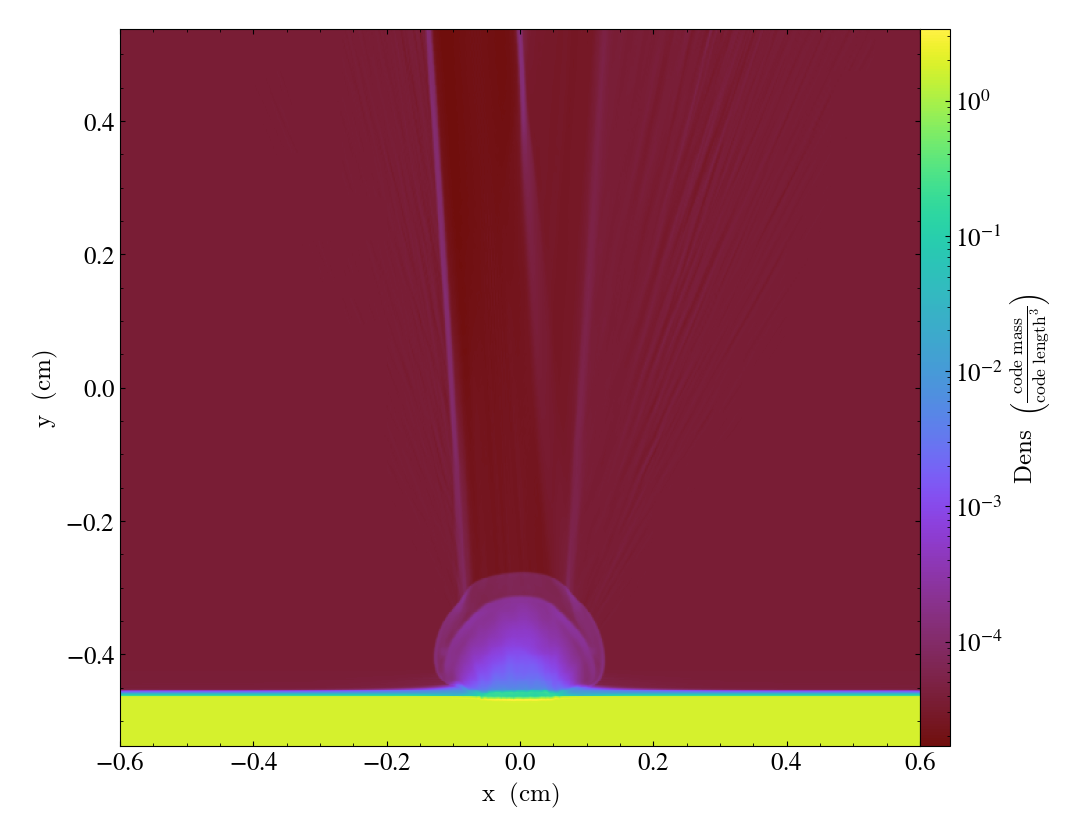

In [12]:
slc = yt.SlicePlot(ds,"z",("dens"))
# slc.annotate_streamlines(("vely"), ("velz"))
slc

yt : [INFO     ] 2024-07-15 16:09:59,213 Projection completed
yt : [INFO     ] 2024-07-15 16:09:59,214 xlim = -0.075000 1.000000
yt : [INFO     ] 2024-07-15 16:09:59,214 ylim = -0.600000 0.600000
yt : [INFO     ] 2024-07-15 16:09:59,216 xlim = -0.075000 1.000000
yt : [INFO     ] 2024-07-15 16:09:59,217 ylim = -0.600000 0.600000
yt : [INFO     ] 2024-07-15 16:09:59,219 Making a fixed resolution buffer of (('flash', 'vely')) 800 by 800



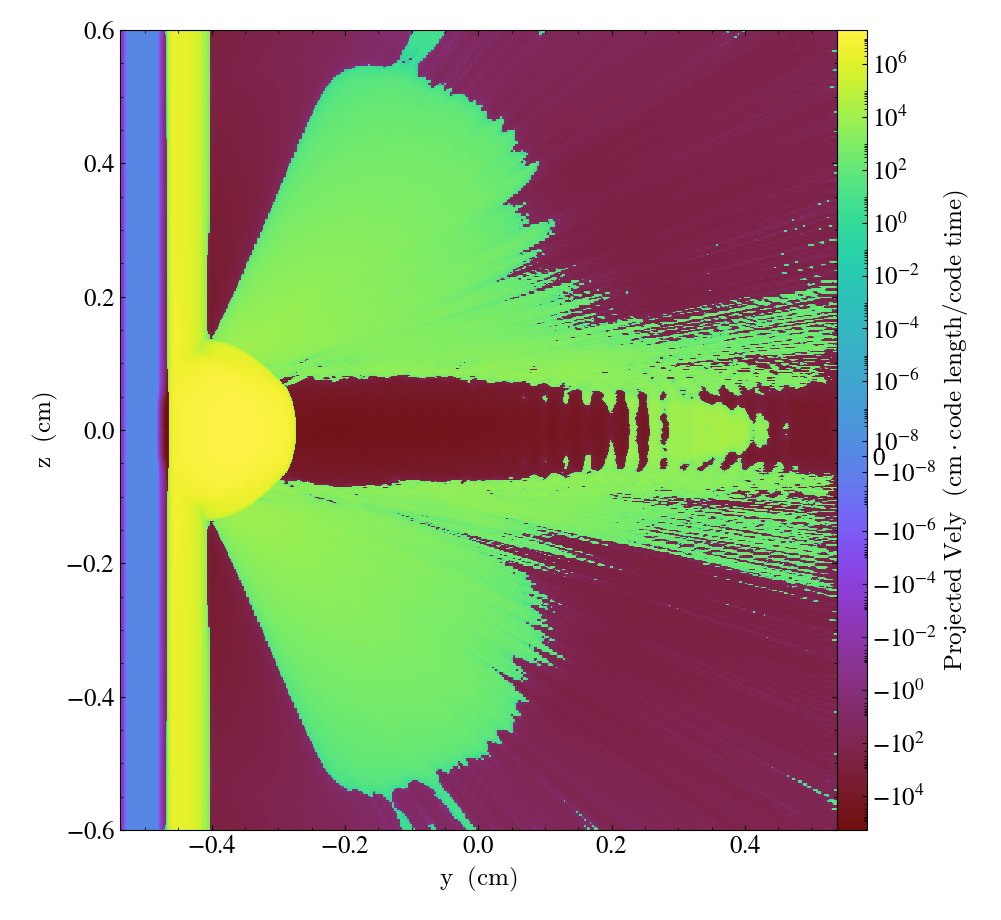

In [71]:
prj = yt.ProjectionPlot(ds,'x','vely')
prj

yt : [INFO     ] 2024-07-15 15:25:43,758 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-07-15 15:25:43,759 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-07-15 15:25:43,761 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-07-15 15:25:43,762 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-07-15 15:25:43,764 Making a fixed resolution buffer of (('flash', 'dens')) 800 by 800


dens at [0.    0.015 0.   ] code_length: [0.00472177] code_mass/code_length**3



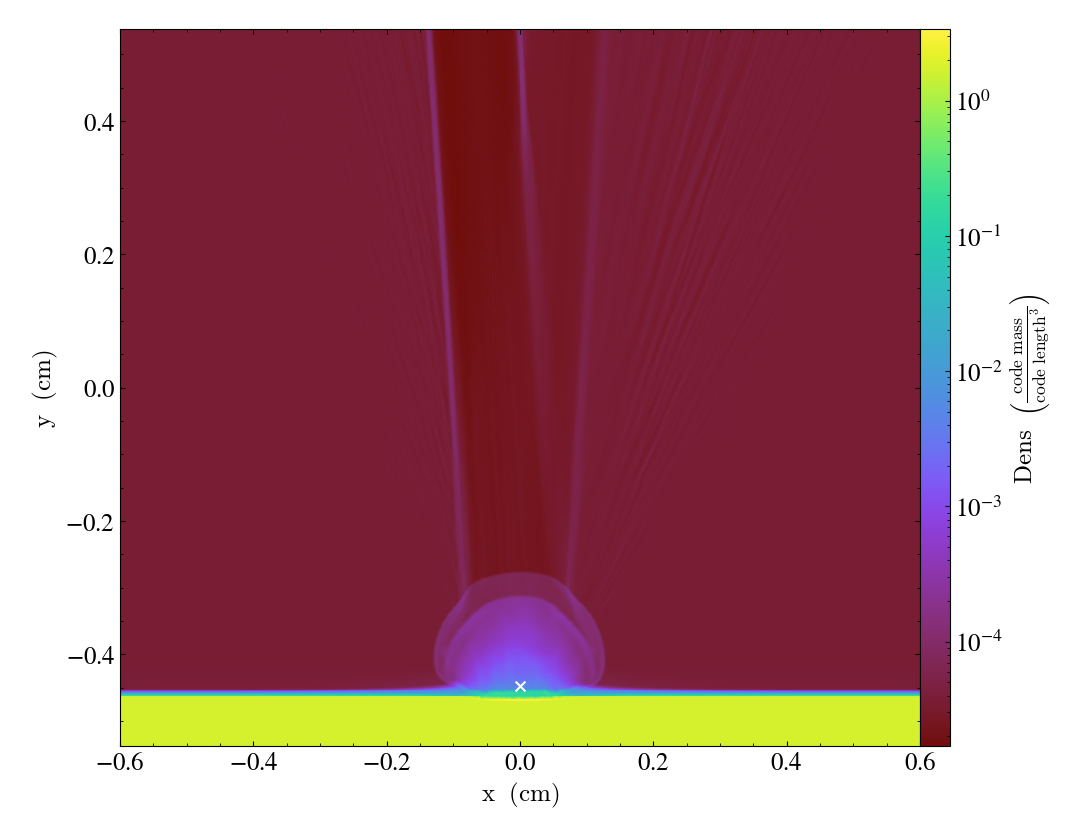

In [14]:
def pull_value_at_coord(x, y, z, field):
    slc = yt.SlicePlot(ds,"z",(field))
    
    # Convert coordinates to dataset units
    coord = ds.arr([x, y, z], 'code_length')

    # Extract the value at the specific coordinates
    value = ds.find_field_values_at_point(fields=('flash',field), coords=coord)
    print(f"{field} at {coord}: {value}")

    slc.annotate_marker(coord)
    return slc

slc_new = pull_value_at_coord(0.0,0.015,0.0,'dens')
slc_new


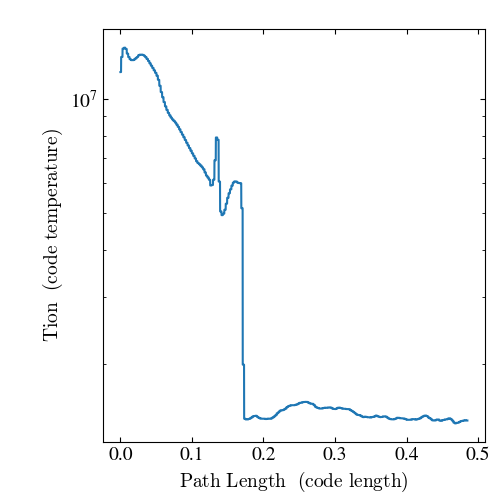
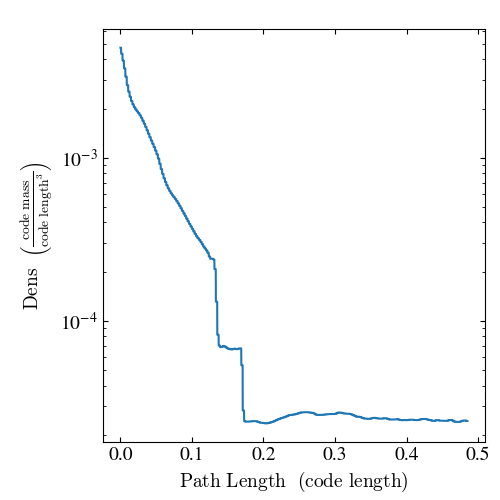

In [15]:
plot = yt.LinePlot(ds, [("flash", "tion"), ("flash", "dens")], (0, 0.015, 0), (0, .5, 0), 50000)
plot.set_log(("flash", "dens"),log = True)

In [69]:
ray = ds.ray((0, 0.015, 0), (0, .5, 0))

dens = np.array(ray[('flash','dens')])
y = np.array(ray[('flash','y')])

from lmfit import Model

def model(t, A, alpha, B, beta, C, t0):
    return A * np.exp(-alpha * t)  + C + B * np.exp(-beta * (t-t0))

# Create a model
exp_model = Model(model)

# Initial guess for the parameters
params = exp_model.make_params(A=0.005, alpha=1.0, B=0.0, beta=0.1, C=0.0, t0 = 0.15)

# Perform the fit
result = exp_model.fit(dens, params, t=y)


[[Model]]
    Model(model)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 400
    # data points      = 246
    # variables        = 6
    chi-square         = 3.8141e-07
    reduced chi-square = 1.5892e-09
    Akaike info crit   = -4978.03878
    Bayesian info crit = -4957.00680
    R-squared          = 0.99714066
[[Variables]]
    A:      0.02186348 +/- 0.00326920 (14.95%) (init = 0.005)
    alpha:  173.939854 +/- 10.5960369 (6.09%) (init = 1)
    B:      1.5400e-04 +/- 42249.4691 (27434115519.27%) (init = 0)
    beta:   22.6505920 +/- 0.31980103 (1.41%) (init = 0.1)
    C:      1.4284e-05 +/- 3.3119e-06 (23.19%) (init = 0)
    t0:     0.14900752 +/- 12118399.7 (8132743481.45%) (init = 0.15)
[[Correlations]] (unreported correlations are < 0.100)
    C(B, t0)       = -1.0000
    C(A, alpha)    = +0.9794
    C(alpha, beta) = +0.6400
    C(A, beta)     = +0.5259
    C(beta, C)     = +0.4855
    C(alpha, C)    = +0.1954
    C(A, C)        = +0.1525
    C(A, B

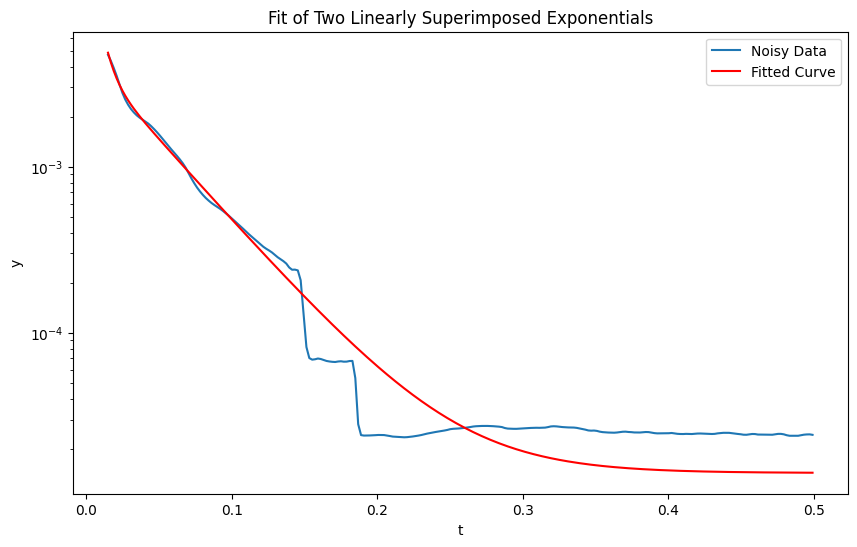

In [70]:
print(result.fit_report())

# Plot the data and the fitted curve
plt.figure(figsize=(10, 6))
plt.semilogy(y, dens, label='Noisy Data')
plt.semilogy(y, result.best_fit, color='red', label='Fitted Curve')
# plt.plot(y,.006*np.exp(-23*y))
plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.title('Fit of Two Linearly Superimposed Exponentials')
plt.show()
